# Modellbildung mechatronischer Systeme (MMS) | Prof. J. Grabow

## Mechatronische Wandler

### Reihenschlussmotor mit konstanter Reibung (LAB 19)

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  8 14:00:31 2024

Program history
08.07.2024    V. 01.00    Start

@author: Prof. Grabow (grabow@amesys.de)
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Motorspannung

In [8]:
def voltage(t):
    if t < T_On:
        return U
    else:
        return 0.0

### DGL.-System zur Motordynamik
$ U = (R_{A}+R_{F}) \cdot I + k_{E} \cdot \omega \cdot I + L \frac{\mathrm{d} I}{\mathrm{d} t} $

$ J \frac{\mathrm{d} \omega }{\mathrm{d} t} = k_{M} \cdot I^{2} - M_{R} $

### Motor- und Simulationsparameter

In [10]:
# Motorparameter
U = 3.4  # Motorspannung
R_A = 1.2  # Ankerwiderstand in Ohm
R_F = 1.1  # Feldwiderstand in Ohm
R = R_A + R_F  # Gesamtwiderstand in Ohm
L_A = 3.54E-3  # Ankerinduktivität in Henry
L_F = 3.0E-3  # Feldinduktivität in Henry
L = L_A + L_F  # Gesamtinduktivität in Henry
k_E = 9.993E-3  # elektrische Konstante
k_M = 984.88E-6  # mechanische Konstante
J = 8.95E-6  # Trägheitsmoment in kg*m^2
T_R = 292E-6  # Reibmoment in Nm

T_On = 2.1  # Einschaltzeit
T_sim = 7.5  # Simulationszeit

# Anfangsbedingungen
I0 = 0.0  # Anfangsstrom in Ampere
omega0 = 0.0  # Anfangsdrehzahl in rad/s
y0 = [I0, omega0]

# Zeitspanne für die Simulation
t = np.linspace(0, T_sim, 1000)  # Simulationszeit, 1000 Punkte

### Lösung des Dgl.-System

In [11]:
# Lösen der Differentialgleichungen
solution = odeint(motor_dynamics, y0, t, args=(R, L, k_E, k_M, J, T_R))

# Extrahieren der Ergebnisse
I = solution[:, 0]
omega = solution[:, 1]

# Nach der Abschaltung (Spannung=0) soll der Strom sofort auf Null gesetzt werden
for i, ti in enumerate(t):
    if ti >= T_On:
        I[i:] = 0.0
        break

### grafische Ausgabe der Ergebnisse

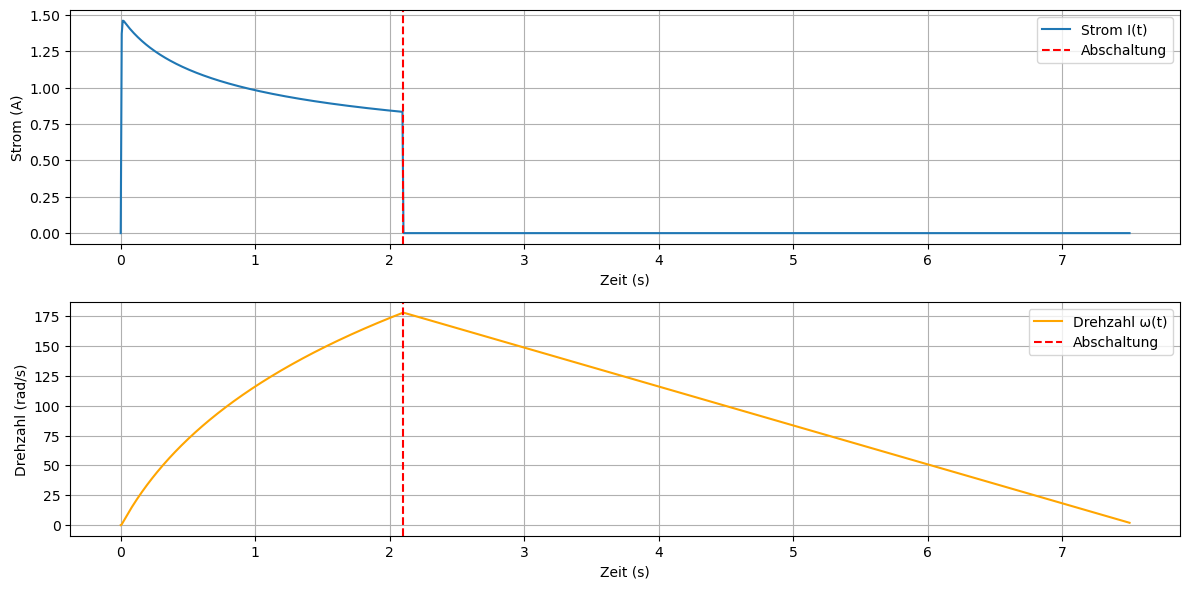

In [12]:
# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, I, label='Strom I(t)')
plt.axvline(x=T_On, color='r', linestyle='--', label='Abschaltung')
plt.xlabel('Zeit (s)')
plt.ylabel('Strom (A)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, omega, label='Drehzahl ω(t)', color='orange')
plt.axvline(x=2.1, color='r', linestyle='--', label='Abschaltung')
plt.xlabel('Zeit (s)')
plt.ylabel('Drehzahl (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()